>#### Mon Jul 15, 2024.
> - Evaluating the PreAmp operation with and without SiPM.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Plotting first the PreAmp scope with no SiPM.

In [29]:
### Wed Jun 5 ###

### Individually pulse-noise from the preamp??

#Bias connected directed in the SiPM PCB
csv_file = 'OpAmpOnly_NoSiPMBias3.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file,skiprows=3, header=None)
data.head()


,0,1
0,-1.000000e-06,-0.018384
1,-9.998000e-07,-0.018384
2,-9.996000e-07,-0.018384
3,-9.994000e-07,-0.018384
4,-9.992000e-07,-0.018384


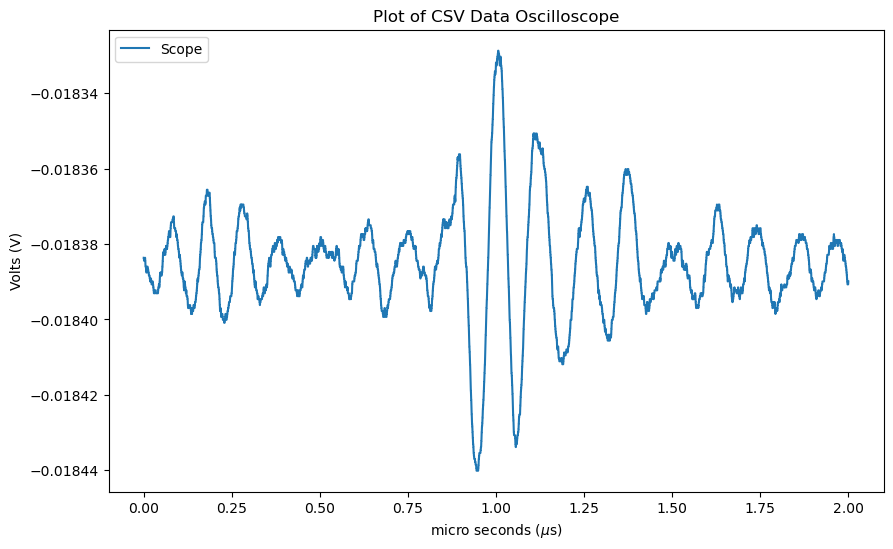

In [35]:

# Extract the columns
x = (data.iloc[:, 0]+1e-6)*10**6  # the first column is seconds
#y1 = data.iloc[:, 1]  # the second column is Volts (WaveGenerator)
y2 = data.iloc[:, 1]  # the second column is Volts (SiPM)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y2, marker='', linestyle='-', label='Scope')
plt.ylabel('Volts (V)')
plt.xlabel(r'micro seconds ($\mu$s)')
#plt.yscale('log')
plt.title('Plot of CSV Data Oscilloscope')
plt.legend(loc='upper left', ncols=1 )
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


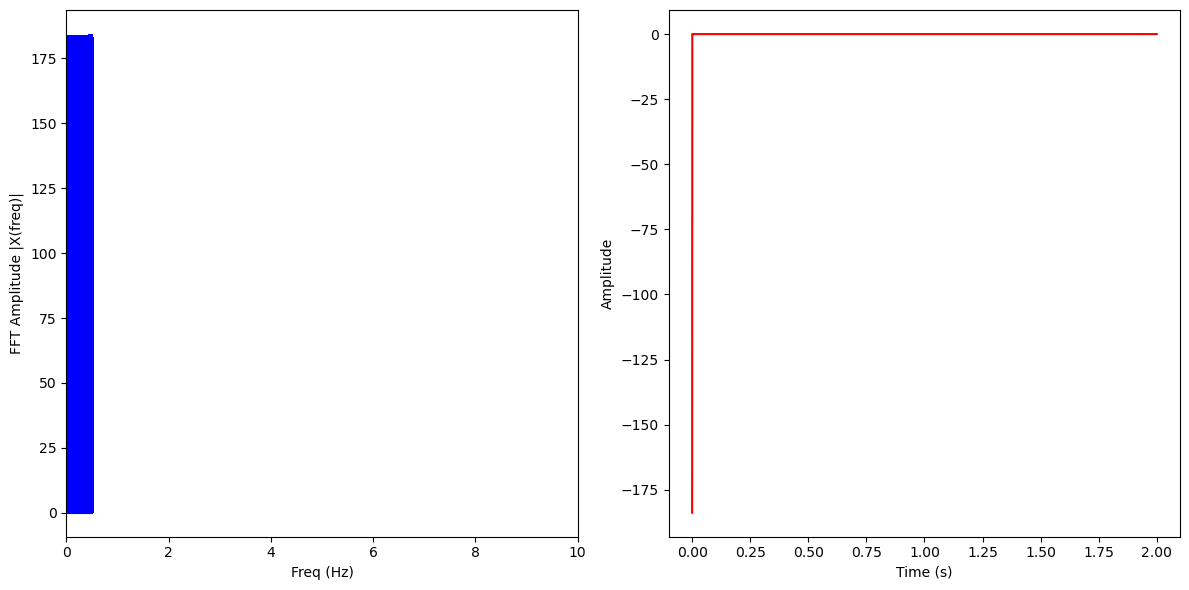

In [39]:
from scipy.fftpack import fft, ifft

X = fft(y1)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(x, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

[-1.83852029e+02+0.j         -1.11855361e-03-0.00134129j
 -3.32095499e-05-0.00138887j ...  2.24366986e-04+0.00031872j
 -3.32095499e-05+0.00138887j -1.11855361e-03+0.00134129j]


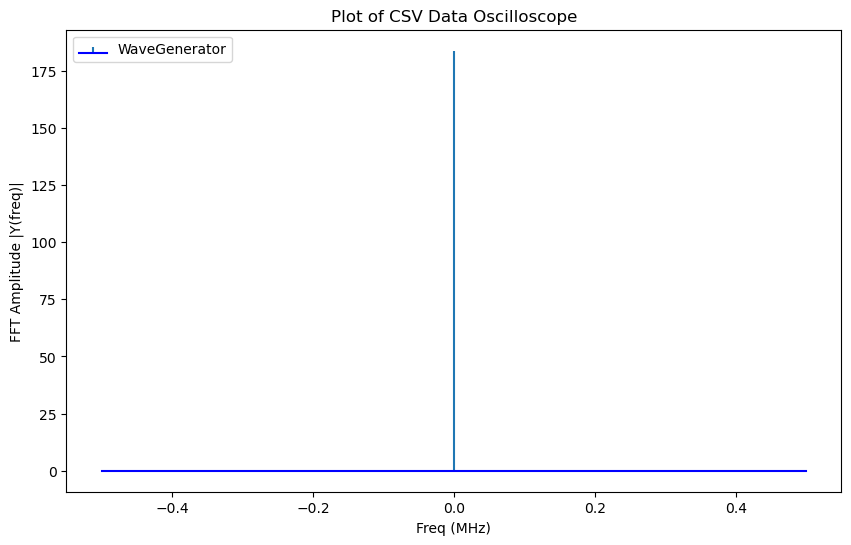

In [36]:
y1 = np.fft.fft(y2)  # the second column is Volts (WaveGenerator)
#y2 = data.iloc[:, 2]  # the second column is Volts (SiPM)

print(y1)
freq = np.fft.fftfreq(y1.shape[-1])

# Plot the data
plt.figure(figsize=(10, 6))
plt.stem(freq, np.abs(y1), label='WaveGenerator',markerfmt=" ", basefmt="-b")
#plt.plot(x, y2, marker='.', linestyle='--',  label='SiPM')
plt.xlabel('Freq (MHz)')
plt.ylabel('FFT Amplitude |Y(freq)|')
#plt.yscale('log')
plt.title('Plot of CSV Data Oscilloscope')
plt.legend(loc='upper left')
plt.show()